<h1 style="LINE-HEIGHT:30px;text-align:center" > ANÁLISE DAS VENDAS DOS PRODUTOS DA HOTMART EM 2016 </h1>
<h2 style="text-align:center" > Guilherme J. S. Passos </h2>
<h3 style="text-align:center" > Belo Horizonte, 12 de Agosto de 2019 </h3>
<br>
<h3> 1. INTRODUÇÃO </h3>
<br>
<div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial;text-indent:30px"> 
    <p>A <a href=https://www.hotmart.com/en/> Hotmart </a> é uma empresa de tecnologia brasileira que possui uma plataforma online de comercialização de conhecimento. A plataforma permite que as pessoas comercializem conteúdo de diversas áreas do conhecimento ou revendem o conteúdo produzido por terceiros. Este notebook apresenta um estudo detalhado das vendas dos produtos da Hotmart no ano de 2016 e tem como objetivo explorar algumas técnicas de análise preponderantes para no ofício da ciência de dados.</p>
    <p>A base de dados a ser analisada possui mais de 1,5 milhões de registros e aproximadamente 227 MB de espaço em disco, portanto não se fez necessário a utilização de um serviço distribuído de arquivos em clusters de máquinas para o processamento e abertura dos dados. Ademais, o fato da base possuir apenas 227 MB de espaço permite que ela seja facilmente carregada na memória de laptop comum.</p>
    <p>Inicialmente, apresentar-se-á brevemente os dados do <i>data set</i> e em seguida será realizada uma transformação no valor de cada venda para que seja possível analisar o faturamento gerado pela empresa; uma vez que essa informação está codificada em termos do zscore. Posteriormente, a quarta seção deste estudo se dedicará a apresentar uma detalhadada exploração dos dados segmentada por produtos e produtores de conteúdo. Por fim, na quinta e última seção se aplicará um modelo de <i>machine learning</i> na série temporal das vendas a fim de se estimar o volume futuro das mesmas.<i> Enjoy!!!</i></p>
</div>
<h3> 2. APRESENTAÇÃO DOS DADOS </h3>
<br>
<div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial;text-indent:30px">
A base de dados em estudo possui os seguintes campos:
    <div style="margin-left: 40px">
        <li><b>purchase_id</b> Identificação da compra na Hotmart;</li>
        <li><b>product_id</b> Identificação do produto na Hotmart;</li>
        <li><b>affiliate_id:</b> Identificação do afiliado na Hotmart, pessoa responsável por revender um determinado produto;</li>
        <li><b>producer_id:</b> Identificação do produtor na Hotmart;</li>
        <li><b>buyer_id:</b> Identificação do comprador na Hotmart;</li>
        <li><b>purchase_date:</b> Data e hora em que a compra foi realizada;</li>
        <li><b>product_creation_date:</b> Data e hora em que o produto foi criado na Hotmart;</li>
        <li><b>product_category:</b> Categoria do produto na Hotmart. Exemplo: e-book, software,
curso online, e-tickets, etc;</li>
        <li><b>product_niche:</b> Nicho de mercado que o produto faz parte. Exemplo: educação, saúde
e bem-estar, sexualidade, etc.;</li>
        <li ><b>purchase_value:</b> Valor da compra codificado em zscore do valor real. </li>
        <li><b>affiliate_commission_percentual:</b> percentual de comissão que o afiliado receberá da
compra;</li>
        <li><b>purchase_device:</b> Tipo de dispositivo utilizado no momento da compra, como:
Desktop, Mobile, Tablet, ou Outros;</li>
         <li><b>purchase_origin:</b> Endereço do site do qual a pessoa veio antes da compra (Facebook, Youtube, etc);</li>
        <li><b>is_origin_page_social_network:</b> informa se essa compra veio de uma URL do
Facebook, Youtube, Instagram, Pinterest, ou Twitter;</li>
    </div>
 </div>

<div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial;text-indent:30px">
    As informações apresentadas nos campos <b>product_niche</b>, <b>product_category</b> e <b>purchase_value</b> foram codificadas por razões de confidencialidade. 
        
       
</div>


In [1]:
import pandas as pd

# Carregamento do data set
sales = pd.read_csv('/home/guilhermepassos/jupyter_projects/2016-Hotmart-sales-data/sales_data.csv', sep=';',
                    encoding='utf-8',header=0)
# Visualização dos dados
sales.sample(5)

,purchase_id,product_id,affiliate_id,producer_id,buyer_id,purchase_date,product_creation_date,product_category,product_niche,purchase_value,affiliate_commission_percentual,purchase_device,purchase_origin,is_origin_page_social_network
1061169,12972308,219755.0,6697083.0,6697083.0,7219109.0,2016-05-04 15:26:03,2016-04-11 10:35:45,Phisical book,Immigration,-0.280,0.0,Desktop,Origin 18eb,"0,0"
672900,12209951,42903.0,442241.0,442241.0,1411620.0,2016-03-22 16:25:55,2012-09-26 12:54:59,Phisical book,YouTube video creation,-0.316,0.0,Smart TV,Origin ef2b,"0,0"
834163,12537856,161751.0,3258640.0,3258640.0,7010513.0,2016-04-11 10:10:28,2015-07-11 17:02:46,Phisical book,Negotiation,0.266,0.0,Desktop,Origin a23c,"0,0"
160581,11161433,189103.0,518624.0,518624.0,6064014.0,2016-01-21 08:14:07,2015-11-30 21:42:19,Podcast,Anxiety management,-0.359,0.0,eReaders,Origin dd9d,"0,0"
1441738,13699466,177507.0,5421826.0,5421826.0,7558051.0,2016-06-13 12:36:31,2015-10-03 18:50:04,Phisical book,Government,0.429,0.0,eReaders,Origin adf0,"0,0"


In [2]:
# Exclusão dos registros que possuem valores nulos
sales = sales.dropna()
len(sales)

1599828

<h3> 3. TRANSFORMAÇÃO DOS DADOS </h3>
<br>
<div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial;text-indent:30px">
    Como pode ser visto no resultado acima, tem-se exatamente <b>1.599.828</b> registros de vendas na base de dados. Contudo, os valores de venda de cada produto estão codificados em termos do zscore. Em estatística, o <a href=https://en.wikipedia.org/wiki/Standard_score>zscore</a> é uma medida que indica a distância em desvios padrão que um determinado valor está da média do conjunto. Em teoria, o domínio do zscore são todos os números reais, mas na prática aproximadamente 99,73% dos valores de um conjunto normalmente distribuído possuem zscore dentro do intervalo fechado [-3,3]. Desta forma, ir-se-á normalizar os zscores dos valores de venda dos produtos dentro do intervalo [0,1] usando a <a href=https://en.wikipedia.org/wiki/Feature_scaling> normalização min-max</a>. As equações a seguir provam que aplicar a normalização min-max no conjunto de zscores de uma variável é equivalente à se aplicar a mesma normalização no conjunto dos valores reais da variável de interesse.
    
 Sejam <i>m, s, l, u e x</i> a média, o desvio padrão, o valor mínimo, o valor máximo e um valor qualquer do conjunto X respectivamente. Tem-se:
 </div>

$$ z = \frac{x - mean(X)}{sd(X)} \space (1); $$
<br>
<p style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial;text-indent:30px">
Onde z representa o zscore de x. Sejam y e y', o valor x e do zscore de x normalizados respectivamente:
</p>
$$ y = \frac{x - l}{u - l} \space (2); $$
<br>
$$y' = \frac{z - min(Z)}{max(Z) - min(Z)} \space (3);  $$
<br>
<p style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial;text-indent:30px">
Substituindo a equação (1) em (3), obtém-se:
<P>
$$y' = \frac{z - min(Z)}{max(Z) - min(Z)} = \frac{\frac{x-m}{s} - \frac{l-m}{s}}{\frac{u-m}{s} - \frac{l-m}{s}} = \frac{  \frac{x - \not{m} - (l- \not{m})}{\not{s}} }{ \frac{u- \not{m}-(l- \not{m})}{\not{s}}} = \frac{x - l}{u - l} = y$$
<br>
<p style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial;text-indent:30px">
O resultado anterior mostra que normalizar o conjunto de zscores de uma variável é equivalente à se normalizar os valores da própria variável. Assim, é possível captar percentualmente o faturamento que cada produto, produtor, categoria ou qualquer outro segmento gerou para a Hotmart sem a necessidade de se utilizar os valores reais das vendas.
</p>

In [3]:
from sklearn import preprocessing
# Transformação Min-Max na coluna purchase_value
min_max_scaler = preprocessing.MinMaxScaler()
sales['purchase_value_norm'] = min_max_scaler.fit_transform(sales[['purchase_value']].values)
sales[['product_id','purchase_value','purchase_value_norm']].sample(6)

,product_id,purchase_value,purchase_value_norm
1417699,207563.0,-0.357,0.001471
949554,193975.0,0.132,0.005380
1468326,148727.0,-0.509,0.000256
882946,122533.0,1.448,0.015899
62748,72421.0,-0.523,0.000144
435120,84932.0,-0.171,0.002958


<h3> 4. EXPLORAÇÃO DOS DADOS </h3>
<br>

<p style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial;text-indent:30px">
    Nesta etapa do estudo, analisar-se-á o total de vendas realizadas e o faturamento gerado por cada produto e produtor de conteúdo.
</p>
<h4 style="text-indent:30px"> 4.1 SEGMENTAÇÃO DAS VENDAS POR PRODUTO </h4>

<p style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial;text-indent:30px">
    Apresenta-se nesta seção a análise das vendas e do faturamento da Hotmart segmentada por produto.
</p>

In [4]:
# Define um método sales_by_id responsável por segmentar as vendas por um dado ID
def sales_by_id(sales,column_id,column_name):

    df = sales.groupby(column_id).count()[['purchase_id']].sort_values(by=['purchase_id'],
                                                                                           ascending=False)
    df.columns = [column_name]
    # Rankeamento dos itens por quantidade de vendas
    df['sales_rank'] = df[column_name].rank(ascending=False)
    # Percentual do total de vendas por item
    df['%_sales'] = sales[column_id].value_counts(normalize=True) *100
    
    return df

<h6 style="text-indent:30px"> <li> Ranking dos produtos que mais vendem </li></h6>

In [5]:
# Obtém as vendas segmentadas por produtos
by_products = sales_by_id(sales,'product_id','sales_by_product')

# ------------------------------------------ Cálculo do faturamento gerado por cada produto
# Lista de produtos
unique = sales.drop_duplicates(subset=['product_id'])
by_products = pd.merge(by_products,
                           unique[['product_id','purchase_value_norm','product_niche','product_category',
                                   'purchase_device']],
                           how='inner',on='product_id')

# Cálculo da receita de cada produto
by_products['revenue_by_product'] = by_products['sales_by_product'] * by_products['purchase_value_norm']
del by_products['purchase_value_norm']
# Rankeamento dos produtos por faturamento
by_products['revenue_rank'] = by_products['revenue_by_product'].rank(ascending=False)
# Percentual do faturamento por produtos
by_products['%_revenue'] = 100*(by_products['revenue_by_product']/by_products['revenue_by_product'].sum())

# Ordenação das colunas
by_products = by_products[['product_id','sales_rank','sales_by_product','%_sales',
                          'revenue_rank','revenue_by_product','%_revenue',
                          'product_niche','product_category','purchase_device']]
# Resultado
by_products.head(10)

,product_id,sales_rank,sales_by_product,%_sales,revenue_rank,revenue_by_product,%_revenue,product_niche,product_category,purchase_device
0,219755.0,1.0,41220,2.576527,1382.0,0.658982,0.010883,Immigration,Phisical book,Desktop
1,130294.0,2.0,32731,2.045907,1.0,92.618615,1.529521,Immigration,Phisical book,eReaders
2,42903.0,3.0,27228,1.701933,4.0,62.899810,1.038739,YouTube video creation,Phisical book,Smart TV
3,63718.0,4.0,24132,1.508412,11.0,45.909866,0.758164,YouTube video creation,Phisical book,eReaders
4,132809.0,5.0,23350,1.459532,2017.0,0.373295,0.006165,Personal finance,Phisical book,Smart TV
5,83377.0,6.0,21601,1.350208,3.0,64.404830,1.063594,Anxiety management,Phisical book,Smart TV
6,149048.0,7.0,16386,1.024235,457.0,2.357660,0.038935,Negotiation,Phisical book,Smart TV
7,59205.0,8.0,16096,1.006108,9.0,47.605314,0.786163,Negotiation,Phisical book,eReaders
8,154310.0,9.0,14455,0.903535,144.0,7.510471,0.124029,Government,Podcast,Smart TV
9,132454.0,10.0,11685,0.730391,333.0,3.175729,0.052445,Online course creation,Phisical book,eReaders


In [6]:
# Total de produtos
len(by_products)

17883

<h6 style="text-indent:30px"> <li> Ranking dos produtos que mais faturam </li></h6>

In [7]:
# Ordena os produtos por faturamento
by_products = by_products.sort_values(by=['%_revenue'],ascending=False)
# Reordenação das colunas
output = by_products[['product_id','revenue_rank','revenue_by_product','%_revenue',
             'sales_rank','sales_by_product','%_sales',
             'product_niche','product_category','purchase_device']].head(10)
output

,product_id,revenue_rank,revenue_by_product,%_revenue,sales_rank,sales_by_product,%_sales,product_niche,product_category,purchase_device
1,130294.0,1.0,92.618615,1.529521,2.0,32731,2.045907,Immigration,Phisical book,eReaders
201,206775.0,2.0,75.616825,1.248751,202.0,1226,0.076633,Careers,Phisical book,eReaders
5,83377.0,3.0,64.404830,1.063594,6.0,21601,1.350208,Anxiety management,Phisical book,Smart TV
2,42903.0,4.0,62.899810,1.038739,3.0,27228,1.701933,YouTube video creation,Phisical book,Smart TV
12,138480.0,5.0,58.973757,0.973904,13.0,9903,0.619004,Presentation skills,Phisical book,Desktop
11,191898.0,6.0,53.892935,0.889998,12.0,10018,0.626192,Anxiety management,Phisical book,eReaders
89,202509.0,7.0,50.045243,0.826457,90.0,2376,0.148516,Accounting,Phisical book,eReaders
137,209799.0,8.0,48.775911,0.805495,138.0,1622,0.101386,Negotiation,Phisical book,eReaders
7,59205.0,9.0,47.605314,0.786163,8.0,16096,1.006108,Negotiation,Phisical book,eReaders
20,150610.0,10.0,46.634338,0.770128,21.0,6253,0.390855,Child psychology,Phisical book,eReaders


<div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial;text-indent:30px"> A tabela anterior reúne todos os produtos rankeados pelo número total de vendas e por faturamento. Os campos mostrados significam o seguinte: 
     <p style="margin-left: 40px">
        <li><b>product_id:</b> Identificação do produto na Hotmart;</li>
        <li><b>sales_rank:</b> Posição do produto no ranking de vendas;</li>
        <li><b>sales_by_product:</b> Quantidade de vendas do produto; </li>
        <li><b>%_sales</b> Percentual de venda do produto em relação as vendas totais; </li>
        <li><b>revenue_rank:</b> Posição do produto no ranking de faturamento;</li>
        <li><b>revenue_by_product:</b> Faturamento gerado pelo produto normalizado;</li>
        <li><b>%_revenue:</b> Percentual do faturamento do produto em relação ao faturamento total;</li>
      </p>
</div>
<div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial;text-indent:30px">
A tabela acima mostra que <b>9 dos 20 produtos mais vendidos foram também os 20 produtos que mais geraram receita para a Hotmart em 2016</b>.
Uma vez obtido o ranking de produtos por número de vendas e faturamento, é possível determinar qual é a relevância percentual de um determinado produto para a Hotmart.</div>

In [8]:
# Define um método sales_relevance responsável por computar a revelância de conjuntos de ranking dos produtos
def sales_relevance(df,rankings,text):
    # Percentual cumulativo do total de vendas de cada produto do ranking
    rank_cum_sales = pd.DataFrame({'%':df['%_sales'].cumsum()})

    # Percentual cumulativo do faturamento de cada produto do ranking
    rank_cum_revenue = pd.DataFrame({'%':df['%_revenue'].cumsum()})

    # Output
    percentage_sales = []
    percentage_revenue = []
    ranks = []
    percentage_amount = []

    for value in rankings:
        # Computa a quantidade de produtos dentro dentro de determinado percentual cumlativo
        ranks.append(text.format(str(value)))
        percentage_sales.append(round(rank_cum_sales .iloc[value-1,0],2))
        percentage_revenue.append(round(rank_cum_revenue.iloc[value-1,0],2))
        # Computa a quantidade percentual de itens
        percentage_amount.append(round(100*(value/len(df)),2))

    return pd.DataFrame({'Rankings':ranks,'Percentage Amount (%)':percentage_amount,
                           'Relevance - Sales (%)':percentage_sales,
                           'Relevance - Revenue (%)':percentage_revenue})

<h6 style="text-indent:30px"> <li> Relevância de alguns rankings de vendas dos produtos para a Hotmart</li></h6>

In [9]:
# Rankeamento dos produtos por faturamento
by_products = by_products.sort_values(by=['%_sales'],ascending=False)
# Rankings a serem analasidados
rankings = [1,5,10,20,60,120,240,450,800,1500,3000,5000]
text = "TOP {} produtos mais vendidos"
# Relevância dos rankings
sales_relevance(by_products,rankings,text)

,Rankings,Percentage Amount (%),Relevance - Sales (%),Relevance - Revenue (%)
0,TOP 1 produtos mais vendidos,0.01,2.58,0.01
1,TOP 5 produtos mais vendidos,0.03,9.29,3.34
2,TOP 10 produtos mais vendidos,0.06,14.31,5.41
3,TOP 20 produtos mais vendidos,0.11,19.51,9.49
4,TOP 60 produtos mais vendidos,0.34,30.49,15.77
5,TOP 120 produtos mais vendidos,0.67,39.87,24.28
6,TOP 240 produtos mais vendidos,1.34,50.17,35.37
7,TOP 450 produtos mais vendidos,2.52,60.21,44.73
8,TOP 800 produtos mais vendidos,4.47,69.81,58.33
9,TOP 1500 produtos mais vendidos,8.39,80.10,72.68


<div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial;text-indent:30px">
    Os campos mostrados tabela acima significam o seguinte: 
     <div style="margin-left: 40px">
        <li><b>Rankings:</b> Rankings dos produtos mais vendidos;</li>
        <li><b>Percentage Amount (%):</b> Quantidade percentual de produtos dentro do ranking </li>
        <li><b>Relevance - Sales (%):</b> Relevância percentual do ranking no total de vendas; </li>
        <li><b>Relevance - Revenue (%):</b> Relevância percentual do ranking no faturamento total da empresa </li>
    </div>  
</div>
<div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial;text-indent:30px">  Os resultados mostrados na tabela acima indicam, dentre outras coisas, que <b> os 60 produtos mais vendidos (cerca de 0,67% dos produtos disponíveis) foram responsáveis por mais de 30% de todas as vendas e, aproximadamente, 16% do faturamento da Hotmart em 2016. </b>
<h6 style="text-indent:30px"> <li> Análise do nicho, categoria e aparelho de compra dos produtos mais vendidos</li></h6>
</div>

In [10]:
# Define um método by_topProducts responsável por analisar os produtos de um terminado rank por um determinado
# filtro 
def by_topProducts(filter, rank):
    output = by_products[[filter,'product_id']].head(rank).groupby([filter]).count().\
                                        sort_values(by=['product_id'],ascending=False)
    output.columns = ['Total de produtos']
    return output
by_topProducts('product_niche',450).head(15)

,Total de produtos
product_niche,
Negotiation,78
Anxiety management,75
Personal finance,58
Presentation skills,40
Government,32
Organization,22
Careers,18
Procrastination,18
Online course creation,16


In [11]:
by_topProducts('product_category',450)

,Total de produtos
product_category,
Phisical book,379
Podcast,57
Workshop,11
eBook,2
Subscription,1


In [12]:
by_topProducts('purchase_device',450)

,Total de produtos
purchase_device,
eReaders,199
Desktop,139
Smart TV,105
Cellphone,6
Tablet,1


<p style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial;text-indent:30px"> A partir dos resultados mostrados nas três tabelas acima é possível concluir que <b>os nichos de negociação, controle de ansiedade, finanças pessoais e habilidades de apresentação foram os que mais ocorrem dentre os 450 produtos mais vendidos</b>. Além disso, pode-se afirmar que <b> os consumidores consumiram mais livros físicos através de eReaders, Desktop e SmartTV.</b> Essas informações podem ser extremamente úteis para as estratégias futuras de marketing da empresa, pois revelam de certa forma as características que mais impactam no sucesso de um produto.<p>

<div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial;text-indent:30px">Essas conclusões podem não condizer com a realidade das vendas realizadas em 2016 pois tais campos foram codificados pela Hotmart por motivos de confidencialidade.
	<h6 style="text-indent:30px"> <li> Relevância de alguns rankings de faturamento dos produtos </h6>
</div> 

In [13]:
# Ordenação dos dados por faturamento
by_products = by_products.sort_values(by=['%_revenue'],ascending=False)
rankings = [1,5,10,20,60,120,240,450,800,1500,3000,5000]
text = "TOP {} produtos que mais faturam"
# Relevância dos rankings
sales_relevance(by_products,rankings,text)

,Rankings,Percentage Amount (%),Relevance - Sales (%),Relevance - Revenue (%)
0,TOP 1 produtos que mais faturam,0.01,2.05,1.53
1,TOP 5 produtos que mais faturam,0.03,5.79,5.85
2,TOP 10 produtos que mais faturam,0.06,8.07,9.93
3,TOP 20 produtos que mais faturam,0.11,11.39,15.97
4,TOP 60 produtos que mais faturam,0.34,15.86,30.37
5,TOP 120 produtos que mais faturam,0.67,21.04,41.56
6,TOP 240 produtos que mais faturam,1.34,30.21,54.00
7,TOP 450 produtos que mais faturam,2.52,40.78,65.22
8,TOP 800 produtos que mais faturam,4.47,51.01,75.36
9,TOP 1500 produtos que mais faturam,8.39,65.39,85.38


<p style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial;text-indent:30px">  Os resultados mostrados na tabela acima indicam, dentre outras coisas, que <b> os 60 produtos que mais faturam (cerca de 0,67% dos produtos disponíveis) foram responsáveis por mais de 30% do faturamento total da Hotmart em 2016</b>. </p>
<p style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial;text-indent:30px"> A imagem a seguir apresenta o faturamento de alguns subconjuntos do ranking de faturamento.</p>

In [14]:
import matplotlib.pyplot as plt  # Matlab-style plotting
from matplotlib import pyplot
from matplotlib import colors as mcolors
import numpy as np

# Define um método scaterr_plot reponsável por gerar um gráfico de pontos identificados por labels
def scaterr_plot(rankings,colors,df,item,title,xlim,ylim):
    
    labels = []
    data = []
    i=0
    for rank in rankings:
        revenue_percentage = round(df.iloc[i:rank,6].sum(),2)
        labels.append("{}% do faturamento | {} {} | Top {} em receita".format(str(revenue_percentage),
                                                                 len(df.iloc[i:rank,6]),
                                                                 item,rank))
        data.append((np.log1p(df.iloc[i:rank,2]),
                    np.log1p(df.iloc[i:rank,5])))
        i=rank

    fig = plt.figure(figsize=(12, 9))
    ax = fig.add_subplot(1, 1, 1, facecolor="10")

    for data,color,label in zip(data,colors,labels):
        x,y=data
        ax.scatter(x,y, alpha=0.8, c=color, edgecolors='none', s=30, label=label)

    plt.title(title, fontsize=16)
    plt.xlabel('Log(Qtde de vendas)', fontsize=14)
    plt.ylabel('Log(Receita gerada)', fontsize=14)                
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

<h6 style="text-indent:30px"> <li> Distribuição dos produtos por quantidade de vendas versus faturamento</h6>

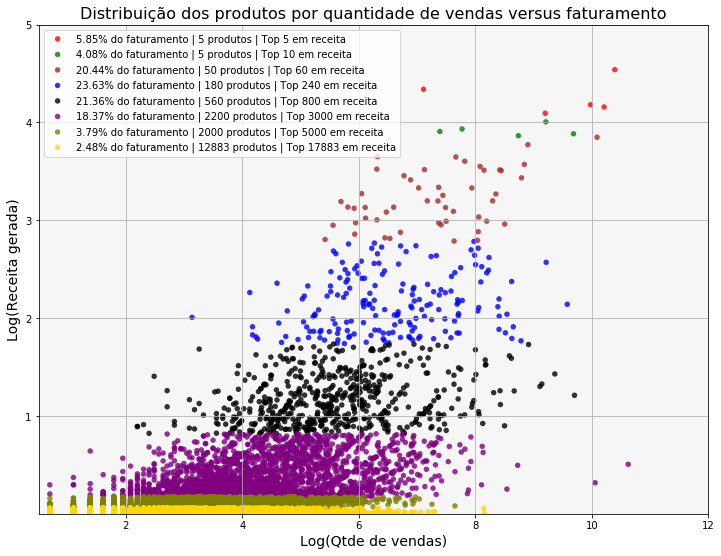

In [15]:
# Reordenação das colunas
by_products = by_products.sort_values(by=['%_revenue'],ascending=False)
rankings = [5,10,60,240,800,3000,5000,len(by_products)]
colors = ('red','green','brown','blue','black','purple','olive','gold')
item = 'produtos'
title = 'Distribuição dos produtos por quantidade de vendas versus faturamento'
xlim = (0.5,12)
ylim = (0.000001,5)
# Gerea o gráfico
scaterr_plot(rankings,colors,by_products,item,title,xlim,ylim)

<p style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial,text-indent:30px">  O gráfico mostrado acima permite extrair alguns <i>insights</i> interessantes. Eles são:</p>
<div style="margin-left: 40px,text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial">
    <ol style="margin-left: 30px;LINE-HEIGHT:30px,text-indent:0px">
        <li> Como os produtos foram ordenados por faturamento, é possível separar perfeitamente os grupos de produtos por cores e perceber que os grupos intermediários foram os maiores geradores de receita para a empesa. Pois, ao se observar a legenda no canto superior esquerdo do gráfico, constata-se que aproximadamente <b> 84% do faturamento da Hotmart em 2016 foi oriundo dos 2990 produtos colocados entre as posições 11° e 3000° do ranking</b>.</li>
        <li> A nuvem de pontos apresentada fornece algumas sugestões de estratégias de negócio para empresa. Por exemplo, <b> o quão mais inclinada for a direção de crescimento da nuvem em relação ao eixo x, maior será o faturamento da Hotmart </b>. Uma outra estratégia interessante que resulta no aumento do faturamento <b> é mover a maior quantidade de pontos possíveis para o centro da nevem; tornando-a mais cheia na região que se encontra os pontos em preto e azul.</b></li>
        <li> Os dois pontos roxos na parte inferior direita do gráfico indicam que <b> esses produtos, apesar de terem sido campeões de venda, não se encontram nem mesmo dentro do ranking dos 800 maiores geradores de receita. </b></li>
    </ol> 
</div>

<div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial;text-indent:30px"> É importante ressaltar que o eixo x  e y do gráfico estão em escala logarítmica. Essa transformação permite uma melhor visualização dos dados, visto que há uma diferença de magnitude significativa entre os valores. 
<h4 style="text-indent:30px"> 4.2 SEGMENTAÇÃO DAS VENDAS POR PRODUTOR DE CONTEÚDO</h4>

<p>Nesta seção será realizada uma análise similar à realizada no item 4.1, mas segmentada por produtor de conteúdo.</p>
<h6 style="text-indent:30px"> <li> Ranking dos produtores que mais vendem </h6>
</div>

In [16]:
by_producers = sales_by_id(sales,'producer_id','sales_by_producer')
revenue_by_producers = sales[['producer_id','purchase_value_norm']].groupby(['producer_id']).sum().\
                                        sort_values(by=['purchase_value_norm'],ascending=False)

revenue_by_producers.columns = ['revenue_by_producer']
revenue_by_producers['revenue_rank'] = revenue_by_producers['revenue_by_producer'].rank(ascending=False)
revenue_by_producers['%_revenue'] = 100*(revenue_by_producers['revenue_by_producer']/ \
                                        revenue_by_producers['revenue_by_producer'].sum())

by_producers['producer_id_x'] = by_producers.index
by_producers = pd.merge(by_producers,revenue_by_producers,how='inner',on='producer_id')
by_producers = by_producers[['producer_id_x','sales_rank','sales_by_producer','%_sales',
                          'revenue_rank','revenue_by_producer','%_revenue']]

by_producers[['sales_rank','sales_by_producer','%_sales',
              'revenue_rank','revenue_by_producer','%_revenue']].head(10)

,sales_rank,sales_by_producer,%_sales,revenue_rank,revenue_by_producer,%_revenue
producer_id,,,,,,
6697083.0,1.0,41220,2.576527,25.0,41.994756,0.606977
3992235.0,2.0,39331,2.458452,11.0,61.712906,0.891977
464846.0,3.0,35470,2.217113,16.0,53.970816,0.780075
349701.0,4.0,34568,2.160732,2.0,124.155321,1.794497
166090.0,5.0,28895,1.806132,18.0,50.821226,0.734552
442241.0,6.0,27798,1.737562,6.0,72.493110,1.047790
2307584.0,7.0,21720,1.357646,30.0,36.981807,0.534522
3382787.0,8.0,20199,1.262573,116.0,12.987035,0.187710
4580574.0,9.0,16386,1.024235,481.0,2.591062,0.037450


In [17]:
# Total de produtores
len(by_producers)

8020

<h6 style="text-indent:30px"> <li> Ranking dos produtores que mais faturam </h6>

In [18]:
by_producers.sort_values(by=['%_revenue'],ascending=False)
output = by_producers[['revenue_rank','revenue_by_producer','%_revenue',
              'sales_rank','sales_by_producer','%_sales']].head(20)

output.head(10)

,revenue_rank,revenue_by_producer,%_revenue,sales_rank,sales_by_producer,%_sales
producer_id,,,,,,
6697083.0,25.0,41.994756,0.606977,1.0,41220,2.576527
3992235.0,11.0,61.712906,0.891977,2.0,39331,2.458452
464846.0,16.0,53.970816,0.780075,3.0,35470,2.217113
349701.0,2.0,124.155321,1.794497,4.0,34568,2.160732
166090.0,18.0,50.821226,0.734552,5.0,28895,1.806132
442241.0,6.0,72.493110,1.047790,6.0,27798,1.737562
2307584.0,30.0,36.981807,0.534522,7.0,21720,1.357646
3382787.0,116.0,12.987035,0.187710,8.0,20199,1.262573
4580574.0,481.0,2.591062,0.037450,9.0,16386,1.024235


<h6 style="text-indent:30px"> <li> Relevância de alguns rankings de vendas segmentados por produtores de conteúdo</h6>

In [19]:
by_producers = by_producers.sort_values(by=['%_sales'],ascending=False)
rankings = [1,5,10,30,60,100,180,300,500,1000,2000,5000]
text = "TOP {} produtores que mais vendem"
sales_relevance(by_producers,rankings,text)

,Rankings,Percentage Amount (%),Relevance - Sales (%),Relevance - Revenue (%)
0,TOP 1 produtores que mais vendem,0.01,2.58,0.61
1,TOP 5 produtores que mais vendem,0.06,11.22,4.81
2,TOP 10 produtores que mais vendem,0.12,17.61,7.34
3,TOP 30 produtores que mais vendem,0.37,29.59,17.91
4,TOP 60 produtores que mais vendem,0.75,39.46,25.86
5,TOP 100 produtores que mais vendem,1.25,48.55,36.00
6,TOP 180 produtores que mais vendem,2.24,60.18,52.39
7,TOP 300 produtores que mais vendem,3.74,70.38,65.01
8,TOP 500 produtores que mais vendem,6.23,79.79,75.79
9,TOP 1000 produtores que mais vendem,12.47,89.94,88.83


<h6 style="text-indent:30px"> <li>  Relevância de alguns rankings de faturamento segmentados por produtores de conteúdo</h6>

In [20]:
# Ordenação dos dados pelo ranking de faturamento
by_producers = by_producers.sort_values(by=['%_revenue'],ascending=False)
rankings = [1,5,10,30,60,100,180,300,500,1000,2000,5000]
text = "TOP {} produtores que mais faturam"
# Relevância dos rankings
sales_relevance(by_producers,rankings,text)

,Rankings,Percentage Amount (%),Relevance - Sales (%),Relevance - Revenue (%)
0,TOP 1 produtores que mais faturam,0.01,0.83,3.66
1,TOP 5 produtores que mais faturam,0.06,4.23,9.28
2,TOP 10 produtores que mais faturam,0.12,7.60,14.09
3,TOP 30 produtores que mais faturam,0.37,22.05,28.03
4,TOP 60 produtores que mais faturam,0.75,29.62,40.92
5,TOP 100 produtores que mais faturam,1.25,34.69,51.15
6,TOP 180 produtores que mais faturam,2.24,47.48,63.91
7,TOP 300 produtores que mais faturam,3.74,59.52,74.52
8,TOP 500 produtores que mais faturam,6.23,72.18,84.11
9,TOP 1000 produtores que mais faturam,12.47,84.69,93.33


<div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial;text-indent:30px"> Os resultados mostrados nas quatro tabelas anteriores são bastante interessantes e revelam um padrão diferente da análise segmentada por produto. Observa-se, por exemplo, que <b>o produtor campeão de vendas foi apenas o 25° no ranking de faturamento, enquanto o 13° maior vendedor foi o maior produtor de receita para a Hotmart. </b> Uma outra conclusão importante é que apenas <b> dois produtores do top 10 de vendas apareceram no ranking dos 10 maiores geradores de receita</b>. Observa-se também que <b>os 5 produtores que mais venderam (11,2% das vendas totais) geraram juntos 4,81% da receita total da empresa; esse resultado é relativamente equivalente ao faturamento gerado pelo produtor que mais gerou receita, 3,66%.</b>
    
Com base nas informações levantadas,<b> os produtores que mais vendem não foram responsáveis pela maior parte do faturamento da Hotmart. </b>
<h6 style="text-indent:30px"> <li> Distribuição dos produtores por quantidade de vendas versus faturamento</h6>
</div>

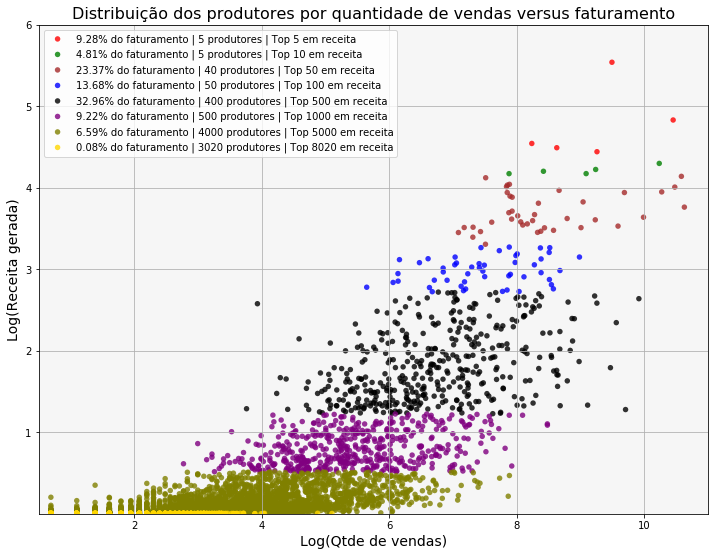

In [21]:
by_producers = by_producers.sort_values(by=['%_revenue'],ascending=False)
rankings = [5,10,50,100,500,1000,5000,len(by_producers)]
colors = ('red','green','brown','blue','black','purple','olive','gold')
item = 'produtores'
title = 'Distribuição dos produtores por quantidade de vendas versus faturamento'
xlim = (0.5,11)
ylim = (0.00000001,6)
# Gerea o gráfico
scaterr_plot(rankings,colors,by_producers,item,title,xlim,ylim)

<p style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial;text-indent:30px"> O gráfico acima fornece informações similiares àquele apresentado na segmentação por produto. Todavia, convém ressaltar <b>a superioridade do futaramento gerado pelo maior produtor (ponto vermelho na parte mais superior do gráfico) em relação à todos os outros produtores.</b></p> 

<h3> 5. PREVISÃO DO FATURAMENTO </h3>

<div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial;text-indent:30px"> A análise de séries temporais é uma técnica bastante engenhosa que pode ser aplicada em diversos
ramos das ciências econômicas para predição de quantitativos financeiros e identificação de padrões
históricos. Pode-se citar como casos de aplicações dessa técnica a identificação de padrões sazonais nas
vendas de uma loja; a predição do número de clientes esperados em um evento; a estimativa do efeito de
um novo produto nas vendas de uma marca; a detecção de eventos adversos e magnitude dos efeitos dos
mesmos no padrão de consumo de uma população; entre outros. 

Nesta seção, objetiva-se predizer o faturamento trismestral da Hotmart no período posterior ao informado na base de dados em estudo a partir de um modelo auto regressivo integrado de médias móveis (<a href=https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average>ARIMA</a>, do inglês). Optou-se pela utilização do modelo ARIMA devido à fácil compreensão matemática do modelo.</div>

<h4 style="text-indent:30px"> 5.1 CONTABILIZAÇÃO DO FATURAMENTO POR DIA </h4>
<h6 style="text-indent:30px"> <li> Faturamento da Hotmart contablizado por dia entre as datas de 31/12/2015 e 30/06/2016</h6>

In [22]:
sales['dts'] = pd.to_datetime(sales['purchase_date'])
sales_timeSeries = sales[['dts','purchase_value_norm']].set_index('dts').\
groupby(pd.Grouper(freq='D')).sum().sort_values(by=['dts'],ascending=True)
sales_timeSeries.columns = ['revenue']
sales_timeSeries.head(10)

,revenue
dts,
2015-12-31,0.407699
2016-01-01,11.826965
2016-01-02,24.353144
2016-01-03,23.225632
2016-01-04,25.074475
2016-01-05,23.013493
2016-01-06,16.885318
2016-01-07,21.994684
2016-01-08,38.277038


<h6 style="text-indent:30px"> <li> Série temporal do faturamento da Hotmart no período analisado</h6>

Text(0, 0.5, 'Faturamento em unidades do produto mais caro')

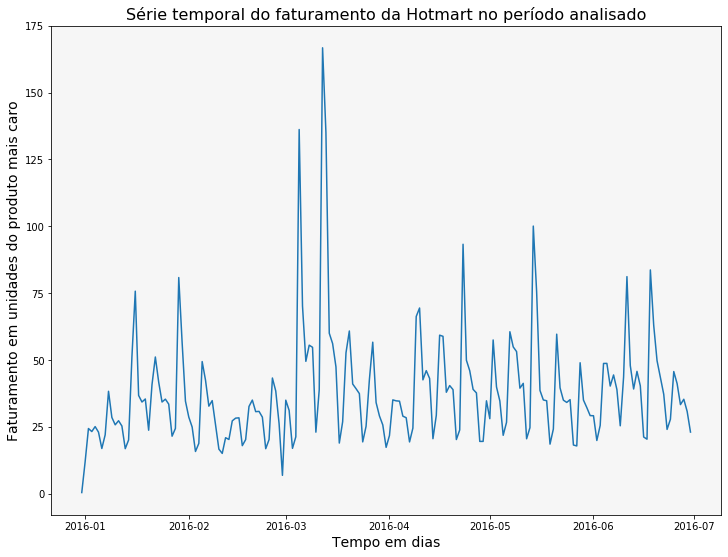

In [23]:
import warnings
warnings.filterwarnings('ignore')

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(1, 1, 1, facecolor="10")
ax.plot(sales_timeSeries)
plt.title('Série temporal do faturamento da Hotmart no período analisado', fontsize=16)
plt.xlabel('Tempo em dias', fontsize=14)
plt.ylabel('Faturamento em unidades do produto mais caro', fontsize=14) 

<h4 style="text-indent:30px"> 5.2 MODELAGEM </h4>
<h6 style="text-indent:30px"> <li> Divisão dos dados em conjuntos de treino e teste</h6>

In [24]:
tr_start,tr_end = '2015-12-31','2016-05-28'
te_start,te_end = '2016-05-29','2016-06-30'
tra = sales_timeSeries['revenue'][tr_start:tr_end].dropna()
tes = sales_timeSeries['revenue'][te_start:te_end].dropna()
print({'Treino': str(len(tra)) + ' amostras','Teste':str(len(tes)) + ' amostras'})

{'Treino': '150 amostras', 'Teste': '33 amostras'}


<h6 style="text-indent:30px"> <li> Breve explicação sobre o modelo ARIMA</h6>

<div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial;text-indent:30px"> 

<p>Referência:<a href=https://www.datascience.com/blog/introduction-to-forecasting-with-arima-in-r-learn-data-science-tutorials> <i> Introduction to Forecasting with ARIMA in R by Ruslana Dalinina</i></a></p>. 

Conforme foi mencionando na seção introdutória, a sigla ARIMA significa no idioma inglês <i> autoregressive integrated moving average </i> ou modelo auto regressivo integrado de médias móveis no português. Modelos ARIMA não sazonais são geralmente especificados pelos três parâmetros (<b>p,d,q</b>).

O componente <b>auto regressivo (AR(p))</b> representa o grau que a série temporal Y é regressada em
seus valores anteriores, ou seja, o parâmetro p especifica a quantidade de valores passados usados no
modelo de regressão. Por exemplo, AR(2) ou ARIMA(2,0,0) é escrito como: </div>

$$Y_t = c + \phi_1y_{t-1} + \phi_2y_{t-2} + e_t $$
<br>
<div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial;text-indent:30px"> Onde &phi;<sub>1</sub> e &phi;<sub>2</sub> representam os coeficientes do modelo regressor.

O componente <b> integrador (I(d)) </b>representa o grau com que os valores da série serão avaliados pelos os valores passodos. A diferenciação remove as mudanças no nível de uma série temporal, eliminando a tendência e a sazonalidade; consequentemente esse processo estabiliza a média da série temporal. Matematicamente, uma operação de diferenciação de ordem 2 ou ARIMA (0,2,0) numa série Y é escrita da seguinte forma: </div>


$$ \nabla Y_{t}^2 = \nabla Y_{t}^1 - \nabla Y_{t-1}^1 \\
\nabla Y_{t}^2 =(Y_t - Y_{t-1})-(Y_{t-1} - Y_{t-2}) \\
\nabla Y_{t}^2 = Y_t - 2Y_{t-1} + Y_{t-2} $$
<br>
<div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial;text-indent:30px"> Onde &nabla;Y<sup>d</sup><sub>t</sub> representa a uma diferenciação de grau d a partir do ponto t.

O componente <b> média móvel (MA(q)) </b> representa o erro de regressão da série como uma
combinação linear dos <i>e</i><sub>t</sub> termos de erros anteriores. O parâmetro <b>q</b> especifica o número de termos a serem incluídos no modelo. Matematicamente, a média móvel de ordem 2 ou ARIMA(0,0,2) de uma
série Y é escrita da seguinte forma: </div>

$$ Y_t = c + \theta_i\mathrm{e}_{t-1} + \theta_2\mathrm{e}_{t-2} +\mathrm{e}_t $$
<br>
<div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial;text-indent:30px"> A auto regressão, diferenciação e a média móvel constituem um modelo ARIMA não sazonal que
pode ser escrito como uma equação linear da seguinte forma: </div>

$$ Y_t = c + \theta_1\nabla Y_{t-1}^d + \theta_p\nabla Y_{t-1}^d + \cdots + \theta_1\mathrm{e}_{t-1} + \theta_q\mathrm{e}_{t-q} + \mathrm{e}_t$$
<br>
<div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial;text-indent:30px"> Perceba que o modelo apresentado acima assume que a série temporal é não sazonal, o que exige
a dessazonalização de séries temporais sazonais antes de aplicá-las no modelo. Esse processo será
apresentado a seguir. </div>

<h6 style="text-indent:30px"> <li> Parametrização do modelo ARIMA</h6>

<div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial;text-indent:30px"> Para se obter uma boa perfomance do modelo ARIMA, é imprescindível que a série temporal seja estacionária, ou seja, que a média, a
variância e a auto covariância da série sejam invariantes no tempo. Tal premissa faz sentido ao se verificar que
as equações que regem o modelo ARIMA utilizam valores anteriores da série temporal para modelar seu
comportamento; assim, modelar uma série estável e com propriedades consistentes garante um resultado em menos
incertezas.

O teste de <a href=https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test> Dickey-Fuller Aumentado</a> ADF (<i>Augmented Dickey-Fuller</i>) é um teste estatístico que
determina se uma série temporal é estacionária ou não. Formalmente, o ADF testa a hipótese nula <b>H<sub>0</sub></b> de 1 ser a raiz da equação característica do modelo auto regressivo. Se a hipótese não for rejeitada, significa que o modelo auto regressivo possui raiz unitária e tal série é não estacionária. O termo <i>p-value </i> da resposta do teste ADF indica as chances do modelo possuir raiz unitária. </div>
 


In [25]:
import statsmodels.api as sm
res = sm.tsa.adfuller(sales_timeSeries['revenue'].dropna(),regression='ct')
print('p-value:{}'.format(res[1]))

p-value:0.027783180125267357


<div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial;text-indent:30px"> Por exemplo, o resultado anterior retornou p-value = 0.027, isso siginifca que há 2,7% de chances da série possuir uma raiz unitária e não ser estacionária.  A priori este resultado é bom, mas pode ser melhorado se for realizada uma
diferenciação de ordem 1 na série original. Conforme foi mencionado anteriormente, a diferenciação
remove as mudanças no nível de uma série temporal, eliminando tendência e sazonalidade e
    consequentemente estabilizando a média da mesma. A diferenciação de ordem <i>m</i> de uma série pode ser
    facilmente realizada utilizando-se a função <b>diff()</b> da bibloteca pandas. </div>

In [26]:
#ADF-test(differenced-time-series)
res = sm.tsa.adfuller(sales_timeSeries['revenue'].diff().dropna(),regression='c')
print('p-value:{}'.format(res[1]))

p-value:1.1010436180807786e-12


<div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial;text-indent:30px"> Ao realizar novamente o ADF teste para a série diferenciada, obtém-se um excelente valor de p-valeu, o que indica que a série temporal do faturamento diferenciada em primeira ordem é estacionária. Assim, o parâmetro <b>d</b> do modelo ARIMA já está determinado e deve ser igual à 1.

Após a série temporal ter sido “estacionarizada” por meio da diferenciação, o próximo passo para ajustar o modelo ARIMA é determinar o grau dos termos AR(p) e MA(q) necessários para corrigir as autocorrelações que restaram na série diferenciada. Uma alternativa para a determinação desses termos é tentar algumas combinações aleatórias de e q e verificar qual tem a melhor performance. Entretanto, há uma maneira mais sofisticada de realizar tal tarefa por meio da análise dos gráficos da função de autacorrelação ACF (<i>Autocorrelation function</i>) e função de auto correlação parcial PAFC (<i>Partial Autocorrelation function</i>) da série diferenciada. Os gráficos ACF e PACF são gráficos de barras que representam o grau de associação entre o valor atual da série temporal e seus anteriores. Os gráficos mostram quais são os valores anteriores da série que são úteis para prever valores futuros. Com esse conhecimento, é possível determinar a ordem dos termos p e q do modelo ARIMA. Resumidamente, o
gráfico AFC está relacionado à média móvel <b>(MA(q))</b> do modelo e indica a correlação entre Y<sub>t</sub> e Y<sub>k</sub>, onde o índice <i>k</i> representa o atraso (lag) temporal de Y<sub>k</sub> em relação à Y<sub>t</sub>; enquanto o gráfico PAFC está relacionado à parte auto regressiva <b>(AR(p))</b> do modelo ARIMA e indica a correlação entre Y<sub>t</sub> e Y<sub>k</sub>.

A seguir, exibe-se os gráficos AFC e PAFC da série temporal diferenciada.
</div>

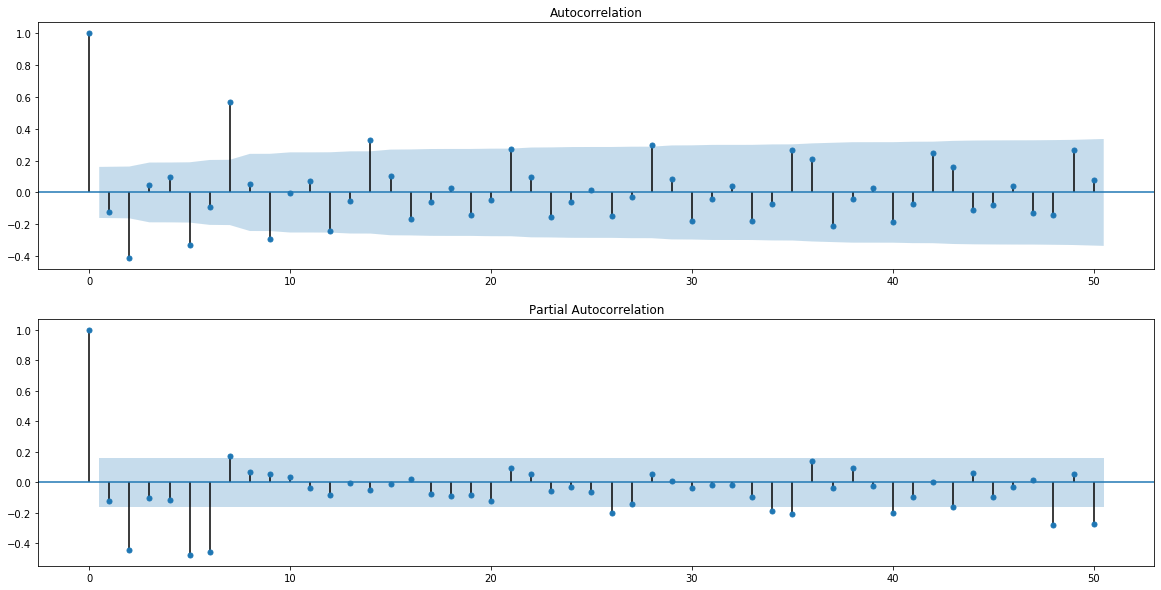

In [27]:
fig,ax = plt.subplots(2,1,figsize=(20,10))
fig = sm.graphics.tsa.plot_acf(tra.diff().dropna(), lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(tra.diff().dropna(), lags=50, ax=ax[1])
plt.show()

<div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial;text-indent:30px"> Picos nos gráficos de AFC e PAFC podem ajudar na determinação dos parâmetros <b>(p,q)</b> do modelo ARIMA, conforme discutido anteriormente. O gráfico AFC indica pontos de correlação significativa nos graus 1 e 7. O gráfico PAFC mostra um relevante pico de grau 1. Esses resultados sugerem que 1 ou 7 são bons valores para <b>q</b> e que 1 é possivelmente o melhor valor para <b>p</b>.
    
Contudo utilizar-se-á o métedo <i>arma_order_select_ic</i> da bibloteca statsmodels.api para buscar os melhores valores de <b>(p,q)</b> dentro do intervalo [1,7] dos números naturais.</div>

In [ ]:
import warnings
warnings.filterwarnings('ignore')
resDiff = sm.tsa.arma_order_select_ic(tra, max_ar=7, max_ma=7, ic='aic', trend='c')
print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

<div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial;text-indent:30px"> O resultado anterior indica que 7 e 1 são os melhores valores para p e q respectivamente.</div>

<h6 style="text-indent:30px"> <li> FItting do modelo ARIMA</h6>

In [ ]:
arima = sm.tsa.statespace.SARIMAX(tra,order=(7,1,1),freq='D',seasonal_order=(0,0,0,0),
                                 enforce_stationarity=False, enforce_invertibility=False,).fit()
arima.summary()

<div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial;text-indent:30px"> O resultado a seguir indica que o erro residual do modelo possui baixa correlação. Isso indica um bom ajuste do modelo aos dados.</div>

In [ ]:
res = arima.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=50, ax=ax[1])
plt.show()

<h6 style="text-indent:30px"> <li> Predição dos dados</h6>

In [ ]:
pred = arima.predict(tr_start,te_end)[1:]

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(1, 1, 1, facecolor="10")
plt.plot(tes.index,tes, 'r', label='Série Real')
plt.plot(tes.index,pred[te_start:te_end],'g', label='Série prevista pelo modelo')
plt.legend(loc='upper left')
plt.xlim(te_start,te_end)
plt.title('Série temporal do faturamento da Hotmart no período analisado', fontsize=16)
plt.xlabel('Tempo em dias', fontsize=14)
plt.ylabel('Faturamento em unidades do produto mais caro', fontsize=14)

In [ ]:
from sklearn.metrics import mean_squared_error
pred = arima.predict(tr_start,te_end)[1:]
real = sales_timeSeries.iloc[1:]
print('ARIMA model MSE:{}'.format(mean_squared_error(tes,pred[te_start:te_end])))

<div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial;text-indent:30px"> A predição do faturamento da Hotmart para os dias do conjunto de teste, vendas realizadas entre 29/05/2016 e 30/06/2016, demonstra que <b> não é possível estimar de maneira assertiva o faturamento que empresa teve nos três
    meses seguintes ao último mês mostrado no dataset </b> utilizando a o modelo ARIMA e os dados disponibilizados. Obersave-se que o <a href=https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test> MSE </a> <i>(Mean squared error),</i> erro médio quadrático está extramente alto, indicando assim uma baixa qualidade da predição. Essa conclusão pode ser feita ao se analisar o gráfico acima. Ressalta-se que modelos de <i>machine learning</i> complexos, como as redes neurais recorrentes, podem obter melhores resultados; entranto, a melhoria da predição da série temporal do faturamento por meio de modelos de ML foge do escopo deste estudo.</div> 